In [1]:
import codecs
import json
import re
import requests

from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch,VerticalPitch

In [2]:
PATTERN = r"{}\s+=\s+JSON.parse\(\'(.*?)\'\)"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8,ml;q=0.7',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.88 Safari/537.36',
}
def fetch(url):

    with requests.get(url,headers=headers) as response:
        return response.text

def find_match(scripts, pattern):

    for script in scripts:
        match = re.search(pattern, script.string)
        if match:
            break
    return match

def decode_data(match):

    byte_data = codecs.escape_decode(match.group(1))
    json_data = json.loads(byte_data[0].decode("utf-8"))

    return json_data

def get_data(url):

    html = fetch(url)
    soup = BeautifulSoup(html, "html.parser")
    scripts = soup.find_all("script")

    pattern = re.compile(PATTERN.format('shotsData'))
    match = find_match(scripts, pattern)
    data = decode_data(match)
    return data


url = 'https://understat.com/match/14811'

data = get_data(url)

In [3]:
data

{'h': [{'id': '424072',
   'minute': '5',
   'result': 'SavedShot',
   'X': '0.9490000152587891',
   'Y': '0.3370000076293945',
   'xG': '0.11425195634365082',
   'player': 'Gabriel Jesus',
   'h_a': 'h',
   'player_id': '5543',
   'situation': 'OpenPlay',
   'season': '2020',
   'shotType': 'RightFoot',
   'match_id': '14811',
   'h_team': 'Manchester City',
   'a_team': 'Everton',
   'h_goals': '5',
   'a_goals': '0',
   'date': '2021-05-23 15:00:00',
   'player_assisted': 'Kevin De Bruyne',
   'lastAction': 'Throughball'},
  {'id': '424073',
   'minute': '7',
   'result': 'MissedShots',
   'X': '0.9159999847412109',
   'Y': '0.5479999923706055',
   'xG': '0.10734514147043228',
   'player': 'John Stones',
   'h_a': 'h',
   'player_id': '586',
   'situation': 'SetPiece',
   'season': '2020',
   'shotType': 'Head',
   'match_id': '14811',
   'h_team': 'Manchester City',
   'a_team': 'Everton',
   'h_goals': '5',
   'a_goals': '0',
   'date': '2021-05-23 15:00:00',
   'player_assisted':

In [95]:
df = pd.DataFrame(data['h'])
df['team']='Manchester City'
df_city = df[['minute', 'team','xG','player','result','X','Y']]

df = pd.DataFrame(data['a'])
df['team']='Everton'
df_everton = df[['minute', 'team','xG','player','result','X','Y']]

In [96]:
df = df_city. append(df_everton, ignore_index=True)

In [97]:
df_city = df_city.apply(pd.to_numeric,errors='ignore')
df_everton = df_everton.apply(pd.to_numeric,errors='ignore')
df = df.apply(pd.to_numeric,errors='ignore')

In [98]:
df_city['X'] = df_city['X']*120
df_city['Y'] = df_city['Y']*80
df_everton['X'] = df_everton['X']*120
df_everton['Y'] = df_everton['Y']*80

In [99]:
df_city

,minute,team,xG,player,result,X,Y
0,5,Manchester City,0.114252,Gabriel Jesus,SavedShot,113.880002,26.960001
1,7,Manchester City,0.107345,John Stones,MissedShots,109.919998,43.839999
2,10,Manchester City,0.024201,Kevin De Bruyne,Goal,92.160004,49.600000
3,13,Manchester City,0.411929,Gabriel Jesus,Goal,106.319998,47.760001
4,22,Manchester City,0.027450,Riyad Mahrez,MissedShots,103.560004,28.400000
5,22,Manchester City,0.050799,Kevin De Bruyne,SavedShot,109.560004,55.920001
6,40,Manchester City,0.068471,Oleksandr Zinchenko,BlockedShot,104.280002,50.800000
7,42,Manchester City,0.053949,Riyad Mahrez,ShotOnPost,95.519998,44.400000
8,51,Manchester City,0.127007,Phil Foden,BlockedShot,103.200000,36.960001
9,51,Manchester City,0.039999,Rúben Dias,SavedShot,101.039996,42.879999


In [100]:
df_everton

,minute,team,xG,player,result,X,Y
0,3,Everton,0.016038,Gylfi Sigurdsson,SavedShot,89.519998,27.039999
1,4,Everton,0.074065,Dominic Calvert-Lewin,SavedShot,105.839996,24.800000
2,32,Everton,0.104009,Richarlison,BlockedShot,103.800000,36.800000
3,35,Everton,0.761169,Gylfi Sigurdsson,SavedShot,106.200000,40.000000
4,36,Everton,0.056958,Richarlison,BlockedShot,116.039996,52.400000
5,37,Everton,0.014287,Lucas Digne,MissedShots,89.760004,53.120001
6,42,Everton,0.082023,Richarlison,BlockedShot,98.760004,39.600000
7,48,Everton,0.007383,Gylfi Sigurdsson,MissedShots,83.039996,41.039999


In [101]:
df_city['X'] = pitch.dim.right - df_city.X
# df_everton['X'] = pitch.dim.right - df_everton.X

In [102]:
df_city

,minute,team,xG,player,result,X,Y
0,5,Manchester City,0.114252,Gabriel Jesus,SavedShot,6.119998,26.960001
1,7,Manchester City,0.107345,John Stones,MissedShots,10.080002,43.839999
2,10,Manchester City,0.024201,Kevin De Bruyne,Goal,27.839996,49.600000
3,13,Manchester City,0.411929,Gabriel Jesus,Goal,13.680002,47.760001
4,22,Manchester City,0.027450,Riyad Mahrez,MissedShots,16.439996,28.400000
5,22,Manchester City,0.050799,Kevin De Bruyne,SavedShot,10.439996,55.920001
6,40,Manchester City,0.068471,Oleksandr Zinchenko,BlockedShot,15.719998,50.800000
7,42,Manchester City,0.053949,Riyad Mahrez,ShotOnPost,24.480002,44.400000
8,51,Manchester City,0.127007,Phil Foden,BlockedShot,16.800000,36.960001
9,51,Manchester City,0.039999,Rúben Dias,SavedShot,18.960004,42.879999


In [103]:
df_everton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   minute  8 non-null      int64  
 1   team    8 non-null      object 
 2   xG      8 non-null      float64
 3   player  8 non-null      object 
 4   result  8 non-null      object 
 5   X       8 non-null      float64
 6   Y       8 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 576.0+ bytes


In [104]:
df_team1 = df_city
df_team2 = df_everton
team1 = 'Manchester City'
team2 = 'Everton'

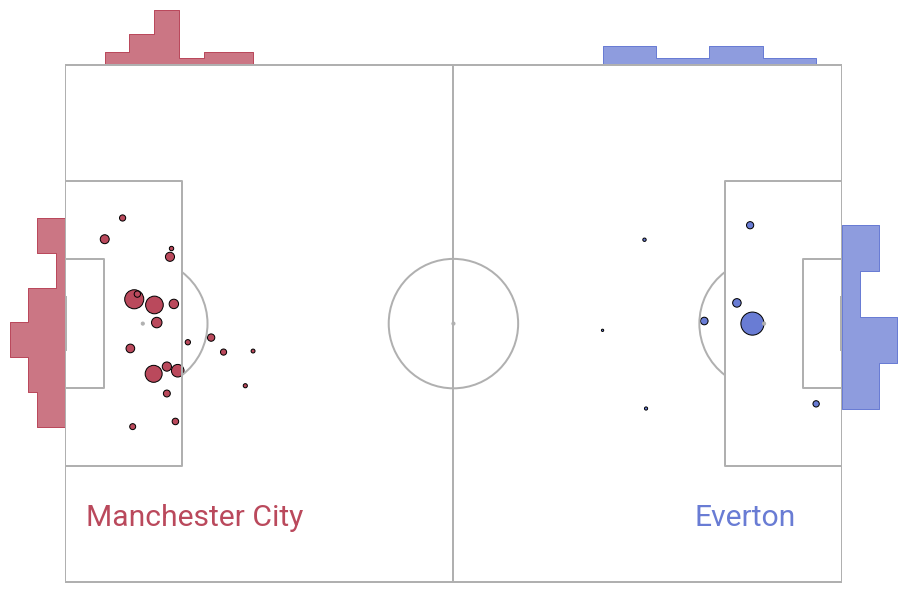

In [113]:
fig, axs = pitch.jointgrid(figheight=10,  # the figure is 10 inches high
                           left=None,  # joint grid center-aligned
                           bottom=0.075,  # grid starts 7.5% in from the bottom of the figure
                           marginal=0.1,  # marginal axes heights are 10% of grid height
                           space=0,  # 0% of the grid height reserved for space between axes
                           grid_width=0.9,  # the grid width takes up 90% of the figure width
                           title_height=0,  # plot without a title axes
                           axis=False,  # turn off title/ endnote/ marginal axes
                           endnote_height=0,  # plot without an endnote axes
                           grid_height=0.8)  # grid takes up 80% of the figure height
# we plot a usual scatter plot but the scatter size is based on expected goals
# note that the size is the expected goals * 700
# so any shots with an expected goals = 1 would take a size of 700 (points**2)
sc_team1 = pitch.scatter(df_team1.X, df_team1.Y, s=df_team1.xG*700,
                         ec='black', color='#ba495c', ax=axs['pitch'])
sc_team2 = pitch.scatter(df_team2.X, df_team2.Y, s=df_team2.xG*700,
                         ec='black', color='#697cd4', ax=axs['pitch'])
# (step) histograms on each of the left, top, and right marginal axes
team1_hist_y = sns.histplot(y=df_team1.Y, ax=axs['left'], element='step', color='#ba495c')
team1_hist_x = sns.histplot(x=df_team1.X, ax=axs['top'], element='step', color='#ba495c')
team2_hist_x = sns.histplot(x=df_team2.X, ax=axs['top'], element='step', color='#697cd4')
team2_hist_y = sns.histplot(y=df_team2.Y, ax=axs['right'], element='step', color='#697cd4')
txt1 = axs['pitch'].text(x=20, y=70, s=team1, fontproperties=fm.prop, color='#ba495c',
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=105, y=70, s=team2, fontproperties=fm.prop, color='#697cd4',
                         ha='center', va='center', fontsize=30)

In [115]:
fig.savefig('ManchesterCityVsEvertonShotmapStats.png',dpi=300,bbox_inches = 'tight')